In [1]:
import pandas as pd
df1 = pd.read_excel("Business_Data.xlsx", parse_dates = ['Date'])
df =pd.read_excel("Sales_History.xlsx", parse_dates = ['Date'])
#df2 = pd.read_excel("Store_Details.xlsx")

C:\Users\dell\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [2]:
df.head()

,Store,Department,Date,Total_Sales,Holiday
0,1,1,2017-04-30,24924.50,False
1,1,1,2017-11-30,46039.49,True
2,1,1,2017-02-17,41595.55,False
3,1,1,2017-02-24,19403.54,False
4,1,1,2017-05-01,21827.90,False


In [3]:
df1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday
0,1,2017-04-30,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2017-11-30,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2017-02-17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2017-02-24,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2017-05-01,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
df_groupby = df.groupby(['Store', 'Date']).agg({'Total_Sales': sum})
df_groupby.sort_index(inplace = True)

In [13]:
df3

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales
0,1,2017-04-30,42.31,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False,1643690.90
1,1,2017-11-30,38.51,2.548,4743.58,364.57,36.26,1176.425,2727.135,211.242170,8.106,True,1641957.44
2,1,2017-02-17,39.93,2.514,4743.58,364.57,36.26,1176.425,2727.135,211.289143,8.106,False,1611968.17
3,1,2017-02-24,46.63,2.561,4743.58,364.57,36.26,1176.425,2727.135,211.319643,8.106,False,1409727.59
4,1,2017-05-01,46.50,2.625,4743.58,364.57,36.26,1176.425,2727.135,211.350143,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8141,45,2020-06-26,76.05,3.639,4842.29,975.03,3.00,2449.970,3169.690,NaN,NaN,False,NaN
8142,45,2020-05-05,77.50,3.614,9090.48,2268.58,582.74,5797.470,1514.930,NaN,NaN,False,NaN
8143,45,2020-12-05,79.37,3.614,3789.94,1827.31,85.72,744.840,2150.360,NaN,NaN,False,NaN
8144,45,2020-07-17,82.84,3.737,2961.49,1047.07,204.19,363.000,1059.460,NaN,NaN,False,NaN


In [8]:
columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

def fillvalue(df1,columns):
    for col in columns:
        median_value = df1[col].median()
        df1[col] = df1[col].fillna(median_value)    

In [9]:
fillvalue(df1, columns)

In [10]:
columns_to_check = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in columns_to_check:
    df1[df1[col] >= 0]

In [11]:
df3 = pd.merge(df1,df_groupby, on = ['Store', 'Date'], how = 'left')

In [17]:
df3['Date'] = df3['Date'].astype('datetime64[ns]')

In [18]:
(df3['Date'].dt.year == 2020).value_counts()

Date
False    6810
True     1336
Name: count, dtype: int64

In [188]:
df3.shape

(8146, 13)

In [19]:
data_train = df3[df3['Total_Sales'].notnull()]
data_test = df3[df3['Total_Sales'].isnull()]

In [29]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6412 entries, 0 to 8106
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Store              6412 non-null   int64  
 1   Date               6412 non-null   int64  
 2   Temperature        6412 non-null   float64
 3   Fuel_Price         6412 non-null   float64
 4   MarkDown1          6412 non-null   float64
 5   MarkDown2          6412 non-null   float64
 6   MarkDown3          6412 non-null   float64
 7   MarkDown4          6412 non-null   float64
 8   MarkDown5          6412 non-null   float64
 9   CPI                6412 non-null   float64
 10  Unemployment_Rate  6412 non-null   float64
 11  Holiday            6412 non-null   bool   
 12  Total_Sales        6412 non-null   float64
dtypes: bool(1), float64(10), int64(2)
memory usage: 657.5 KB


In [28]:
data_train['Date'] = data_train['Date'].astype('int64')

C:\Users\dell\AppData\Local\Temp\ipykernel_7272\243200992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Date'] = data_train['Date'].astype('int64')


In [23]:
import statsmodels.api as sm

def perform_anova(data_train, factor_col, target_col):
    model = sm.formula.ols(f'{target_col} ~ C({factor_col})', data=data_train).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    return anova_table

anova_result = perform_anova(data_train, 'Holiday', 'Total_Sales')
print(anova_result)

                  sum_sq      df         F    PR(>F)
C(Holiday)  2.849208e+12     1.0  8.955358  0.002777
Residual    2.039385e+15  6410.0       NaN       NaN


In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode the column containing 'True' and 'False' strings
encoded_version = label_encoder.fit_transform(df3['Holiday'])

# Update the original DataFrame with the encoded column
df3['Holiday'] = encoded_version

In [88]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
# Split the data into features (X) and target (y)
X = data_train[['Store', 'Holiday','Temperature','Fuel_Price','CPI', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Unemployment_Rate']]
y = data_train['Total_Sales']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [89]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to be scaled
scaled_cols = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Unemployment_Rate']

# Scale the selected columns
data_train.loc[:, scaled_cols] = scaler.fit_transform(data_train[scaled_cols])
data_test.loc[:, scaled_cols] = scaler.fit_transform(data_test[scaled_cols])

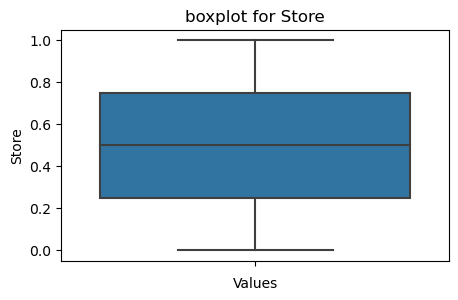

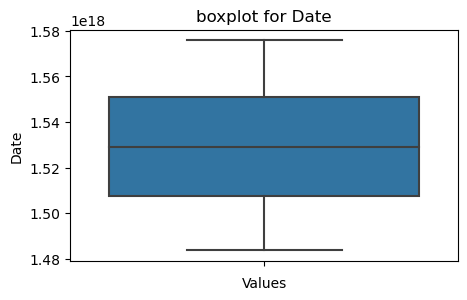

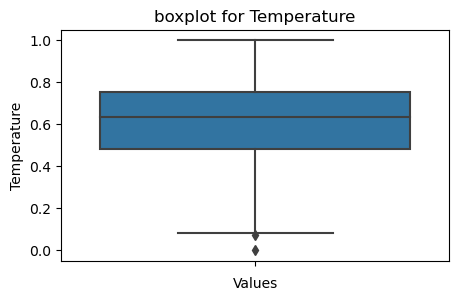

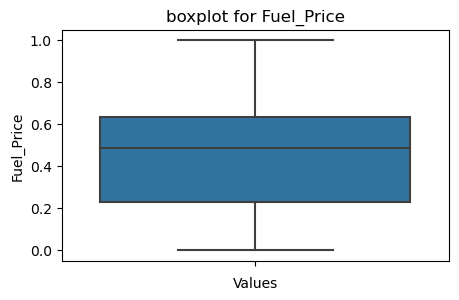

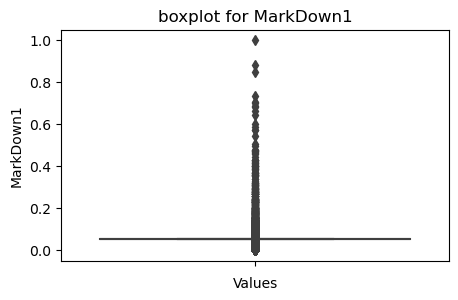

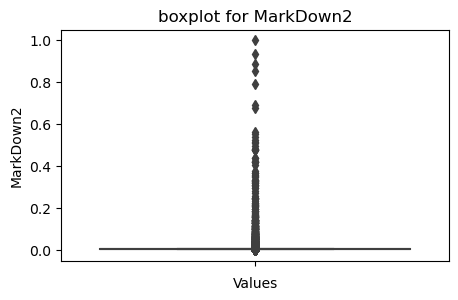

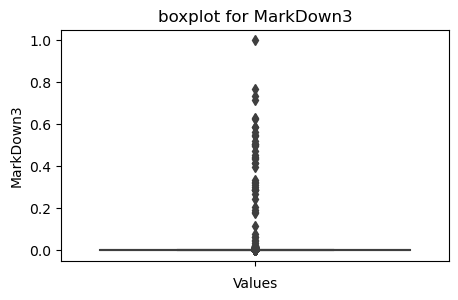

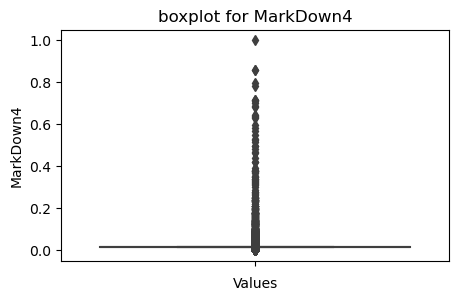

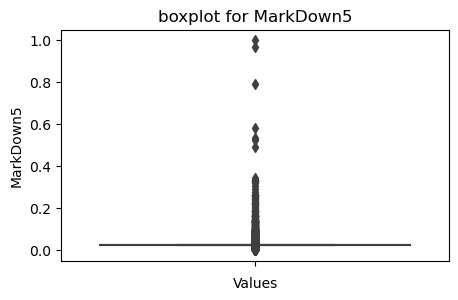

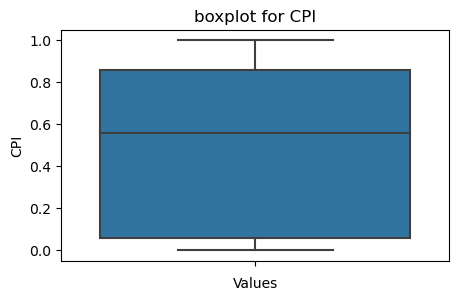

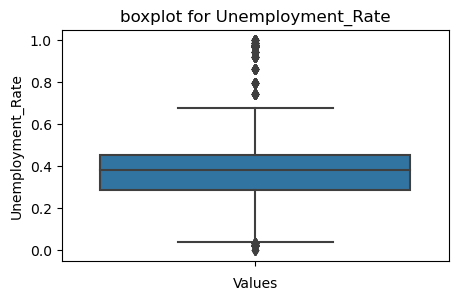

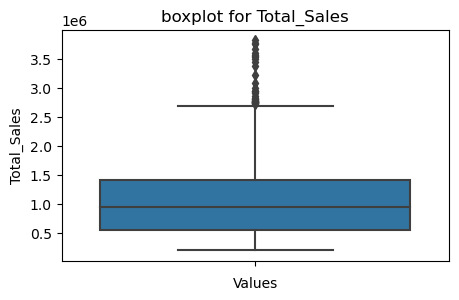

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
for col in data_train.select_dtypes(include = ['int','float']):
   plt.figure(figsize=(5,3))
   sns.boxplot(y=data_train[col], data = data_train, orient = 'v')
   plt.title(f"boxplot for {col}")
   plt.xlabel('Values')
   plt.ylabel(col)
   plt.show()

In [90]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred = lr.predict(X_test)

In [92]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores
avg_mse = mse_scores.mean()
print("Cross-Validation Mean Squared Error Scores:", mse_scores)
print("Average Mean Squared Error:", avg_mse)

Cross-Validation Mean Squared Error Scores: [2.55531294e+11 2.53874539e+11 2.49536837e+11 2.36014232e+11
 2.68031891e+11]
Average Mean Squared Error: 252597758639.35736


In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score 

print(mean_squared_error(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))
print(mean_absolute_percentage_error(y_test, y_test_pred))
print(r2_score(y_test, y_test_pred))

275547896244.24756
432875.8826437285
0.6086765111917364
0.14937638615906523


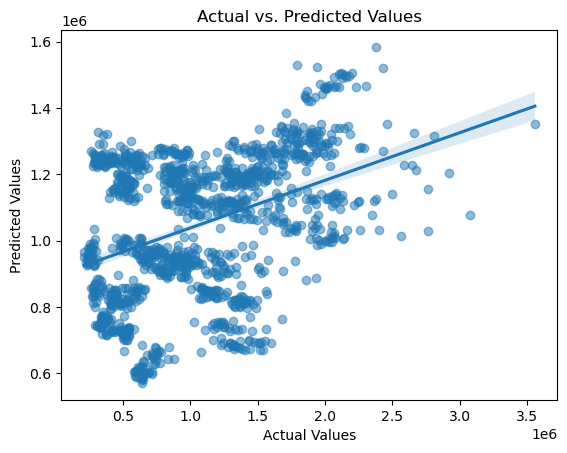

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test contains the actual target values and y_pred_test contains the predicted values for the test dataset

# Create a scatter plot with regression line
sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'alpha':0.5})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()
